https://www.kaggle.com/datasets/themrityunjaypathak/covid-cases-and-deaths-worldwide?resource=download

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Call the Data

In [2]:
dataset=pd.read_csv(r'covid_worldwide.csv',thousands=',') #thousands digunakan untuk mengubah ribuan menjadi titik
dataset.tail()

,Serial Number,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
226,227,Diamond Princess,712,13.0,699.0,0.0,NaN,NaN
227,228,Vatican City,29,NaN,29.0,0.0,NaN,799.0
228,229,Western Sahara,10,1.0,9.0,0.0,NaN,626161.0
229,230,MS Zaandam,9,2.0,7.0,0.0,NaN,NaN
230,231,Tokelau,5,NaN,NaN,5.0,NaN,1378.0


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Serial Number    231 non-null    int64  
 1   Country          231 non-null    object 
 2   Total Cases      231 non-null    int64  
 3   Total Deaths     225 non-null    float64
 4   Total Recovered  210 non-null    float64
 5   Active Cases     212 non-null    float64
 6   Total Test       213 non-null    float64
 7   Population       228 non-null    float64
dtypes: float64(5), int64(2), object(1)
memory usage: 14.6+ KB


# Change Data Type

In [4]:
dataset.columns

Index(['Serial Number', 'Country', 'Total Cases', 'Total Deaths',
       'Total Recovered', 'Active Cases', 'Total Test', 'Population'],
      dtype='object')

In [5]:
numeric=['Total Cases', 'Total Deaths',
       'Total Recovered', 'Active Cases', 'Total Test', 'Population']
for i in numeric:
    dataset[i] = dataset[i].astype('float64')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Serial Number    231 non-null    int64  
 1   Country          231 non-null    object 
 2   Total Cases      231 non-null    float64
 3   Total Deaths     225 non-null    float64
 4   Total Recovered  210 non-null    float64
 5   Active Cases     212 non-null    float64
 6   Total Test       213 non-null    float64
 7   Population       228 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 14.6+ KB


# Statistic

In [6]:
dataset.describe()

,Serial Number,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
count,231.000000,2.310000e+02,2.250000e+02,2.100000e+02,2.120000e+02,2.130000e+02,2.280000e+02
mean,116.000000,2.923460e+06,3.005778e+04,2.993905e+06,9.099885e+04,3.249316e+07,2.849326e+07
std,66.828138,9.479286e+06,1.053806e+05,9.520209e+06,7.663888e+05,1.177370e+08,1.022803e+08
min,1.000000,5.000000e+00,1.000000e+00,2.000000e+00,0.000000e+00,7.850000e+03,7.990000e+02
25%,58.500000,2.400100e+04,2.230000e+02,2.197250e+04,5.250000e+01,3.478150e+05,4.450815e+05
50%,116.000000,2.065920e+05,2.179000e+03,2.351455e+05,1.115000e+03,2.216193e+06,5.676382e+06
75%,173.500000,1.296146e+06,1.445200e+04,1.465768e+06,1.022875e+04,1.298426e+07,2.170759e+07
max,231.000000,1.041969e+08,1.132935e+06,1.013228e+08,1.095262e+07,1.159833e+09,1.406632e+09


# Handling Missing Value

In [7]:
df=dataset.copy()
df

,Serial Number,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
0,1,USA,104196861.0,1132935.0,101322779.0,1741147.0,1.159833e+09,3.348053e+08
1,2,India,44682784.0,530740.0,44150289.0,1755.0,9.152658e+08,1.406632e+09
2,3,France,39524311.0,164233.0,39264546.0,95532.0,2.714902e+08,6.558452e+07
3,4,Germany,37779833.0,165711.0,37398100.0,216022.0,1.223324e+08,8.388360e+07
4,5,Brazil,36824580.0,697074.0,35919372.0,208134.0,6.377617e+07,2.153536e+08
...,...,...,...,...,...,...,...,...
226,227,Diamond Princess,712.0,13.0,699.0,0.0,NaN,NaN
227,228,Vatican City,29.0,NaN,29.0,0.0,NaN,7.990000e+02
228,229,Western Sahara,10.0,1.0,9.0,0.0,NaN,6.261610e+05
229,230,MS Zaandam,9.0,2.0,7.0,0.0,NaN,NaN


In [8]:
df.isnull().sum()

Serial Number       0
Country             0
Total Cases         0
Total Deaths        6
Total Recovered    21
Active Cases       19
Total Test         18
Population          3
dtype: int64

In [9]:
df[df['Total Deaths'].isnull()]

,Serial Number,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
221,222,Tuvalu,2805.0,NaN,NaN,2805.0,NaN,12066.0
222,223,Saint Helena,2166.0,NaN,2.0,2164.0,NaN,6115.0
223,224,Falkland Islands,1930.0,NaN,1930.0,0.0,8632.0,3539.0
225,226,Niue,747.0,NaN,746.0,1.0,NaN,1622.0
227,228,Vatican City,29.0,NaN,29.0,0.0,NaN,799.0
230,231,Tokelau,5.0,NaN,NaN,5.0,NaN,1378.0


* Berdasarkan berita dari link https://www.cnbcindonesia.com/news/20210118165137-4-216931/tuvalu-hingga-turkmenistan-ini-deretan-negara-bebas-covid-19 disebutkan bahwa Tuvalu adalah negara bebas covid. Jadi Total Deaths di Tuvalu akhibat Covid adalah 0 kejadian.
* Berdasarkan berita dari link https://covid19.place/sh/km-kh/?lang=id-id disebutkan bahwa Saint Helena adalah negara bebas covid.Jadi Total Deaths di Saint Helena akhibat Covid adalah 0 kejadian.
* Berdasarkan berita dari link https://www.worldometers.info/coronavirus/country/falkland-islands-malvinas/ disebutkan bahwa Total Death di Falkland Island adalah 0 kejadian. Data ini diupdate di tanggal 23 Februari 2023.
* Berdasarkan berita dari link https://www.cnbcindonesia.com/news/20211226190350-4-302138/belum-ada-kasus-covid-19-di-6-negara-ini-yang-bener-nih disebutkan bahwa Niue tidak memiliki warga mati karena covid.
* Berdasarkan berita dari link https://covid19.place/va/km-kh/?lang=id-ID disebutkan bahwa Total Depth di Vatikan akhibat Covid adalah 0 kejadian.
* Tokelau 0 kematian akhibat covid.(Tidak ditemukan berita di Tokelau)


In [10]:
df[df['Total Recovered'].isnull()]

,Serial Number,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
10,11,Turkey,17042722.0,101492.0,NaN,NaN,162743369.0,85561976.0
65,66,Tunisia,1150356.0,29308.0,NaN,NaN,4997373.0,12046656.0
77,78,Paraguay,806256.0,19820.0,NaN,NaN,2657506.0,7305843.0
94,95,Honduras,470757.0,11104.0,NaN,NaN,1619676.0,10221247.0
111,112,Martinique,229687.0,1097.0,NaN,NaN,828928.0,374087.0
112,113,Laos,217973.0,758.0,NaN,NaN,1233207.0,7481023.0
113,114,Iceland,208688.0,229.0,NaN,NaN,1996384.0,345393.0
117,118,Guadeloupe,201394.0,1007.0,NaN,NaN,938039.0,399794.0
136,137,Suriname,82020.0,1398.0,NaN,NaN,239603.0,596831.0
138,139,French Polynesia,77957.0,649.0,NaN,NaN,NaN,284164.0


Berdasarkan link https://covid19.place/?country=PY seluruh kota yang disebutkan di atas total recovery adalah 0 kejadian

In [11]:
df[df['Active Cases'].isnull()]

,Serial Number,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
10,11,Turkey,17042722.0,101492.0,NaN,NaN,162743369.0,85561976.0
65,66,Tunisia,1150356.0,29308.0,NaN,NaN,4997373.0,12046656.0
77,78,Paraguay,806256.0,19820.0,NaN,NaN,2657506.0,7305843.0
94,95,Honduras,470757.0,11104.0,NaN,NaN,1619676.0,10221247.0
111,112,Martinique,229687.0,1097.0,NaN,NaN,828928.0,374087.0
112,113,Laos,217973.0,758.0,NaN,NaN,1233207.0,7481023.0
113,114,Iceland,208688.0,229.0,NaN,NaN,1996384.0,345393.0
117,118,Guadeloupe,201394.0,1007.0,NaN,NaN,938039.0,399794.0
136,137,Suriname,82020.0,1398.0,NaN,NaN,239603.0,596831.0
138,139,French Polynesia,77957.0,649.0,NaN,NaN,NaN,284164.0


Berdasarkan link https://covid19.place/?country=PY seluruh kota yang disebutkan di atas kasus aktif 
adalah 0 kejadian

In [12]:
df[df['Total Test'].isnull()]

,Serial Number,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
29,30,DPRK,4772813.0,74.0,4772739.0,0.0,NaN,25990679.0
138,139,French Polynesia,77957.0,649.0,NaN,NaN,NaN,284164.0
150,151,Seychelles,50665.0,172.0,50440.0,53.0,NaN,99426.0
156,157,Tanzania,42664.0,846.0,NaN,NaN,NaN,63298550.0
172,173,Solomon Islands,24575.0,153.0,NaN,NaN,NaN,721159.0
181,182,Nicaragua,18491.0,225.0,4225.0,14041.0,NaN,6779100.0
183,184,Tajikistan,17786.0,125.0,17264.0,397.0,NaN,9957464.0
190,191,Marshall Islands,15584.0,17.0,15528.0,39.0,NaN,60057.0
203,204,Comoros,8992.0,161.0,8827.0,4.0,NaN,907419.0
215,216,Kiribati,5008.0,18.0,2703.0,2287.0,NaN,123419.0


In [13]:
df[df['Population'].isnull()]

,Serial Number,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
90,91,China,503302.0,5272.0,379053.0,118977.0,160000000.0,NaN
226,227,Diamond Princess,712.0,13.0,699.0,0.0,NaN,NaN
229,230,MS Zaandam,9.0,2.0,7.0,0.0,NaN,NaN


In [14]:
df.columns

Index(['Serial Number', 'Country', 'Total Cases', 'Total Deaths',
       'Total Recovered', 'Active Cases', 'Total Test', 'Population'],
      dtype='object')

In [15]:
df['Total Deaths']=df['Total Deaths'].fillna(0)
df['Total Recovered']=df['Total Recovered'].fillna(0)
df['Active Cases']=df['Active Cases'].fillna(0)
df['Total Test']=df['Active Cases'].fillna(df['Total Deaths']+df['Total Recovered']+df['Active Cases']+df['Total Cases'])
df['Population']=df['Population'].fillna(df['Total Test']*5)

In [16]:
numeric=['Total Cases', 'Total Deaths',
       'Total Recovered', 'Active Cases', 'Total Test', 'Population']
for i in numeric:
    df[i] = df[i].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Serial Number    231 non-null    int64 
 1   Country          231 non-null    object
 2   Total Cases      231 non-null    int64 
 3   Total Deaths     231 non-null    int64 
 4   Total Recovered  231 non-null    int64 
 5   Active Cases     231 non-null    int64 
 6   Total Test       231 non-null    int64 
 7   Population       231 non-null    int64 
dtypes: int64(7), object(1)
memory usage: 14.6+ KB


In [17]:
numeric=['Total Cases', 'Total Deaths',
       'Total Recovered', 'Active Cases', 'Total Test', 'Population']
numerical = df[numeric].columns
numerical

Index(['Total Cases', 'Total Deaths', 'Total Recovered', 'Active Cases',
       'Total Test', 'Population'],
      dtype='object')

In [18]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 10
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

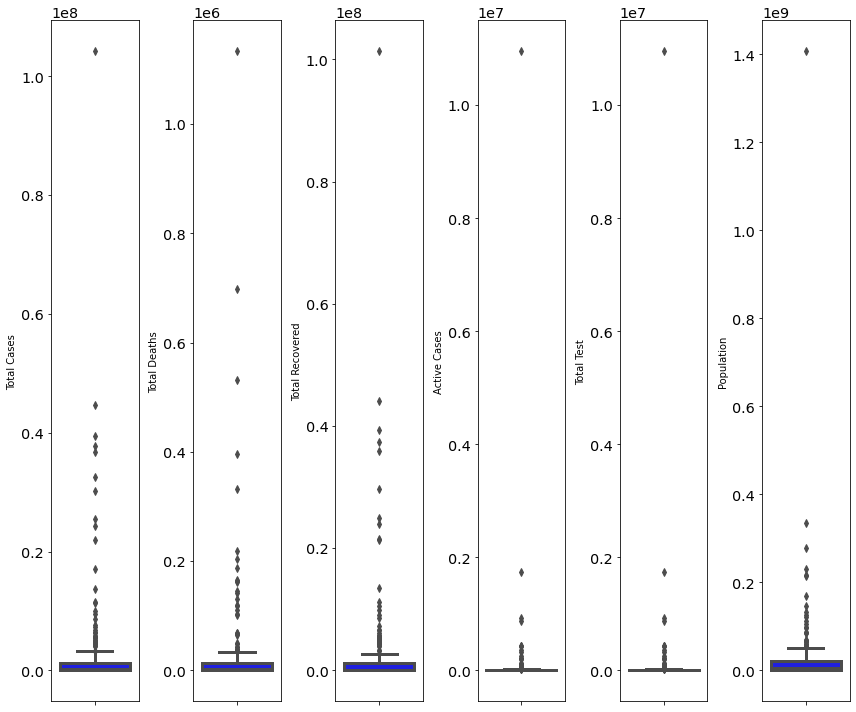

In [19]:
for i in range(0, len(numerical)):
    plt.subplot(1, len(numerical), i+1)
    sns.boxplot(y= df[numerical[i]], color='blue', orient='v')
    plt.tight_layout()

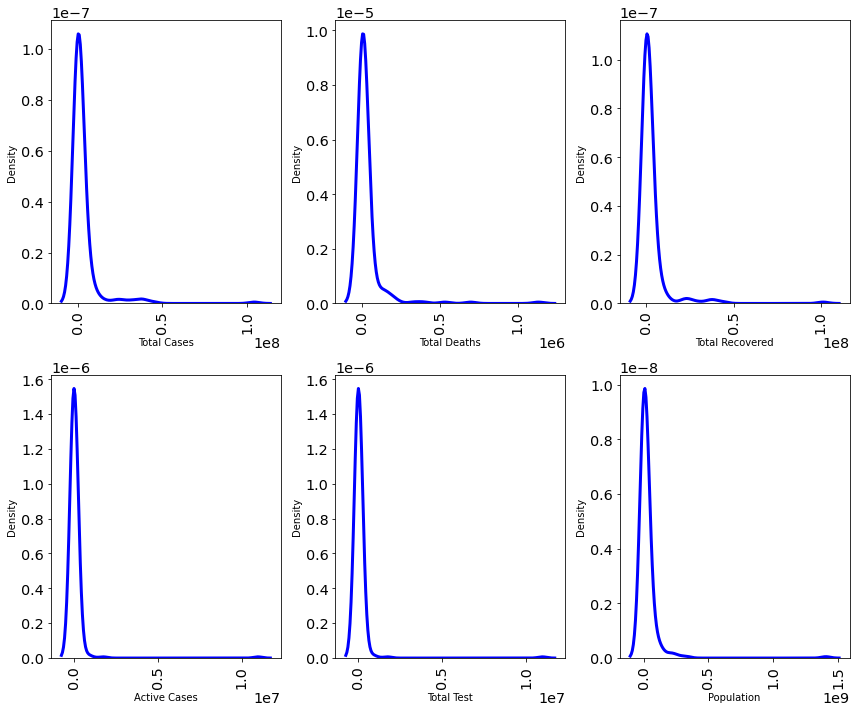

In [20]:
for i in range (0,len(numerical)):
    plt.subplot(2,3, i+1)
    sns.kdeplot(x=df[numerical[i]], color='blue')
    plt.xlabel(numerical[i])
    plt.xticks(rotation=90)
    plt.tight_layout()

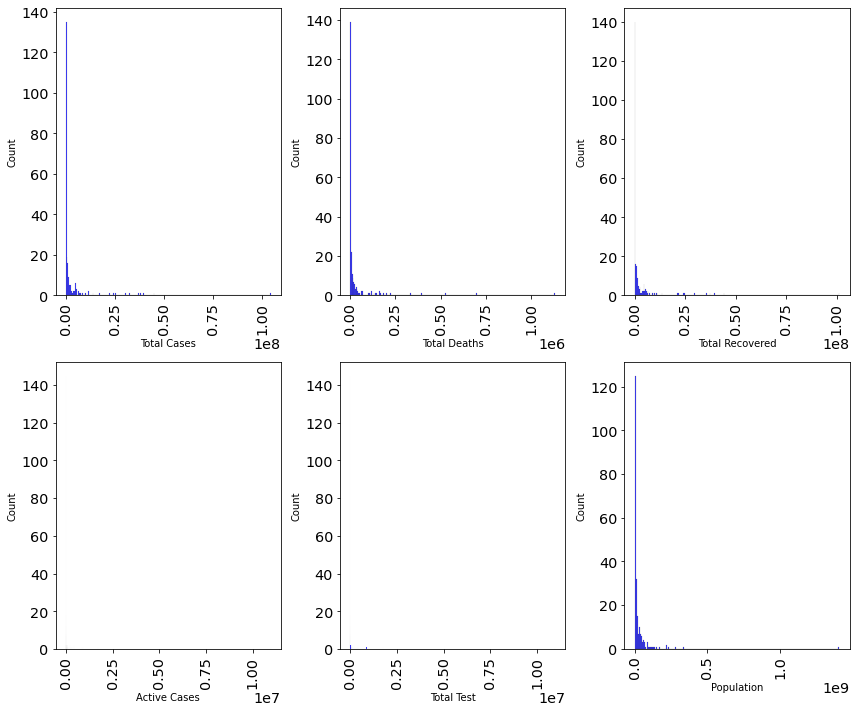

In [21]:
for i in range (0,len(numerical)):
    plt.subplot(2,3, i+1)
    sns.histplot(x=df[numerical[i]], color='blue')
    plt.xlabel(numerical[i])
    plt.xticks(rotation=90)
    plt.tight_layout()

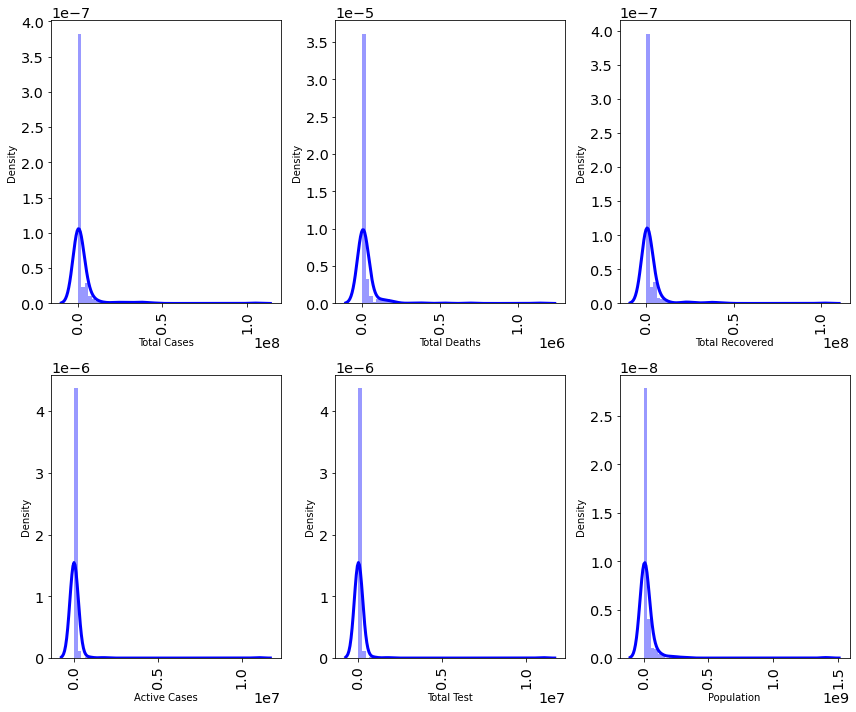

In [22]:
import warnings
warnings.filterwarnings('ignore')
for i in range (0,len(numerical)):
    plt.subplot(2,3, i+1)
    sns.distplot(x=df[numerical[i]], color='blue')
    plt.xlabel(numerical[i])
    plt.xticks(rotation=90)
    plt.tight_layout()

In [23]:
import plotly.express as px

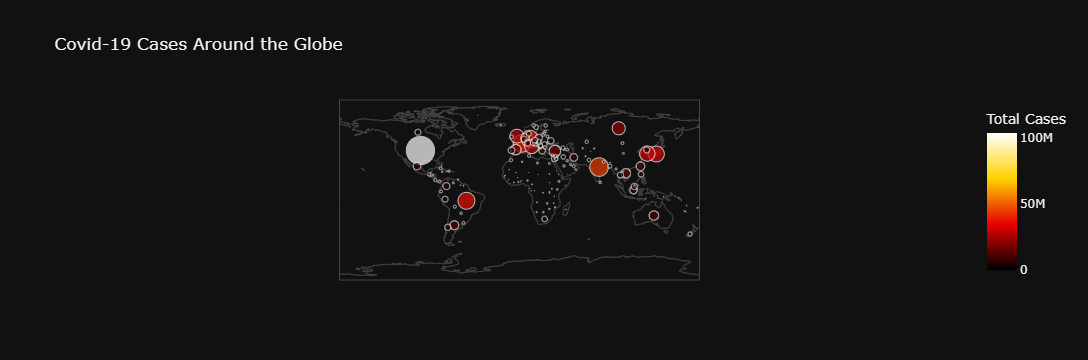

In [54]:
fig = px.scatter_geo(df, locations='Country',locationmode="country names",scope="world",
                     color="Total Cases",size="Total Cases",size_max=20,title="Covid-19 Cases Around the Globe",
                     template='plotly_dark',color_continuous_scale="hot") 
#locationmode adalah variabel variabel yang ada pada fitur locations
#size_max untuk besar ukuran lingkaran 
#scope untuk peta
fig.show()

In [110]:
High_Cases = df.sort_values('Total Cases', ascending=False)
df1= High_Cases[:10] #mengambil 10 urutan pertama
df1

,Serial Number,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population,Percentage of Death Case
0,1,USA,104196861,1132935,101322779,1741147,1741147,334805269,0.011
1,2,India,44682784,530740,44150289,1755,1755,1406631776,0.012
2,3,France,39524311,164233,39264546,95532,95532,65584518,0.004
3,4,Germany,37779833,165711,37398100,216022,216022,83883596,0.004
4,5,Brazil,36824580,697074,35919372,208134,208134,215353593,0.019
5,6,Japan,32588442,68399,21567425,10952618,10952618,125584838,0.002
6,7,S. Korea,30197066,33486,29740877,422703,422703,51329899,0.001
7,8,Italy,25453789,186833,25014986,251970,251970,60262770,0.007
8,9,UK,24274361,204171,24020088,50102,50102,68497907,0.008
9,10,Russia,21958696,395108,21356008,207580,207580,145805947,0.018


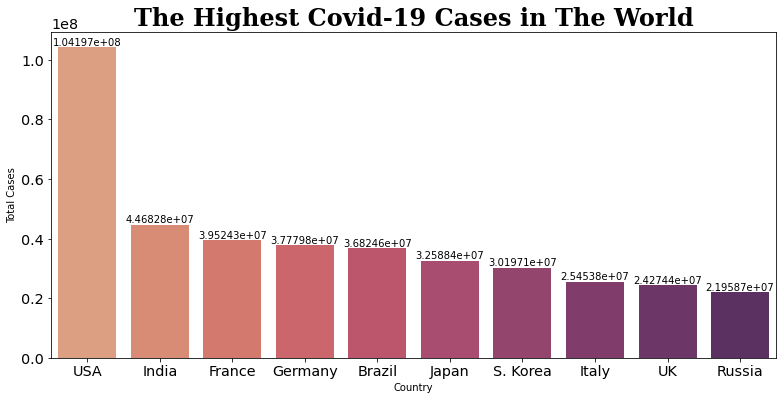

In [111]:
plt.figure(figsize=(13,6))
ax= sns.barplot(x='Country', y='Total Cases', data=df1, palette='flare')
for label in ax.containers:
    ax.bar_label(label, label_type='edge')
plt.title('The Highest Covid-19 Cases in The World',fontsize=24, fontweight='bold', fontname="serif")
plt.show()

In [112]:
df1['Percentage of Death Case'] = round(df1['Total Deaths']/df1['Total Cases'],3)

In [113]:
High_Cases = df1.sort_values('Percentage of Death Case', ascending=False)
High_Cases[:10] #mengambil 10 urutan pertama

,Serial Number,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population,Percentage of Death Case
4,5,Brazil,36824580,697074,35919372,208134,208134,215353593,0.019
9,10,Russia,21958696,395108,21356008,207580,207580,145805947,0.018
1,2,India,44682784,530740,44150289,1755,1755,1406631776,0.012
0,1,USA,104196861,1132935,101322779,1741147,1741147,334805269,0.011
8,9,UK,24274361,204171,24020088,50102,50102,68497907,0.008
7,8,Italy,25453789,186833,25014986,251970,251970,60262770,0.007
2,3,France,39524311,164233,39264546,95532,95532,65584518,0.004
3,4,Germany,37779833,165711,37398100,216022,216022,83883596,0.004
5,6,Japan,32588442,68399,21567425,10952618,10952618,125584838,0.002
6,7,S. Korea,30197066,33486,29740877,422703,422703,51329899,0.001


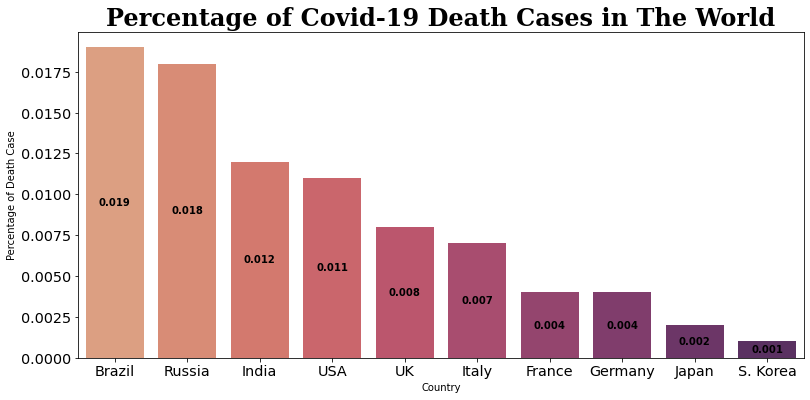

In [114]:
plt.figure(figsize=(13,6))
ax= sns.barplot(x='Country', y='Percentage of Death Case', data=High_Cases[:10], palette='flare')
for label in ax.containers:
    ax.bar_label(label, label_type='center', fontweight='bold')
plt.title('Percentage of Covid-19 Death Cases in The World',fontsize=24, fontweight='bold', fontname="serif")
plt.show()